# 🌽🌽Predicting the Crop using Machine Learning

In this notebook, We are going to do project with the goal of predicting the crop by knowing the soil properties.


The data I'll be using is from the Kaggle

In [4]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="./data/supervised-projects-6-step-ml-framework-tools-highlight.png", width=300, height=300)

6 Step Machine Learning Modelling Framework

To work through these topics, I'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

# 1. Problem Definition

How well can I predict the crop, given its characteristics previous examples of crop properties?

# 2. Data

*N - ratio of Nitrogen content in soil*</br>
*P - ratio of Phosphorous content in soil*</br>
*K - ratio of Potassium content in soil*</br>
*temperature - temperature in degree Celsius*</br>
*humidity - relative humidity in %*</br>
*ph - ph value of the soil*</br>
*rainfall - rainfall in mm*

# 3. Evaluation

Accuracy: The proportion of true results (both true positives and true negatives) among the total number of cases examined. This metric gives a general idea of the model's effectiveness.

Precision: This metric indicates the accuracy of positive predictions. It is calculated as the number of true positives divided by the sum of true positives and false positives. High precision implies that the model has a low false positive rate.

# 4. Features

One of the most common ways to do this, is to create a data dictionary.
First, we'll import the dataset and start exploring. Since we know the evaluation metric we are trying to minimise, our first goal will be building a baseline model and seeing how it works.

In [6]:
# Timestamp
import datetime

print(f"Notebook run:{datetime.datetime.now()}")

Notebook run:2024-10-28 09:00:58.509482


# Importing the data and preparing it for modelling

In [8]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import the data set
df=pd.read_csv("./data/Crop_recommendation.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.shape

(2200, 8)

# Data Exploration (exploratory data analysis or EDA)

1.What question(s) are we trying to solve?</br>
2.What's missing from the data and how do we deal with it?</br>
3.How can we add, change or remove features to get more out of our data?

In [12]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [14]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

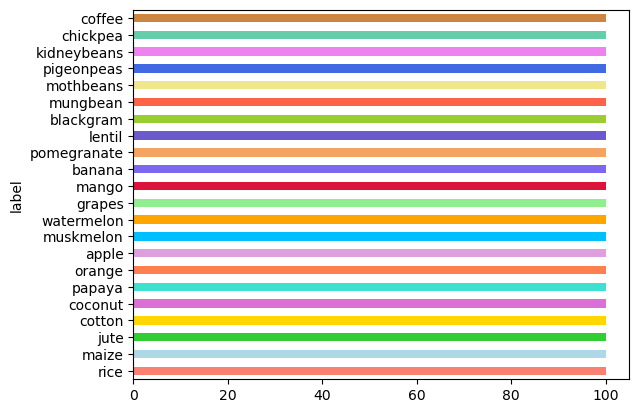

In [17]:

colors = [
    "salmon", "lightblue", "limegreen", "gold", "orchid", "turquoise", "coral", "plum", 
    "deepskyblue", "orange", "lightgreen", "crimson", "mediumslateblue", "sandybrown", 
    "slateblue", "yellowgreen", "tomato", "khaki", "royalblue", "violet", "mediumaquamarine", 
    "peru"
]

df["label"].value_counts().plot(kind="barh", color=colors)
plt.show()



In [18]:
# Are there any missing values?
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [26]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [32]:
rice_rainfall_stats = df[df["label"] == "rice"]["rainfall"].describe()
print(rice_rainfall_stats)


count    100.000000
mean     236.181114
std       34.291825
min      182.561632
25%      204.334023
50%      233.119859
75%      264.126903
max      298.560117
Name: rainfall, dtype: float64


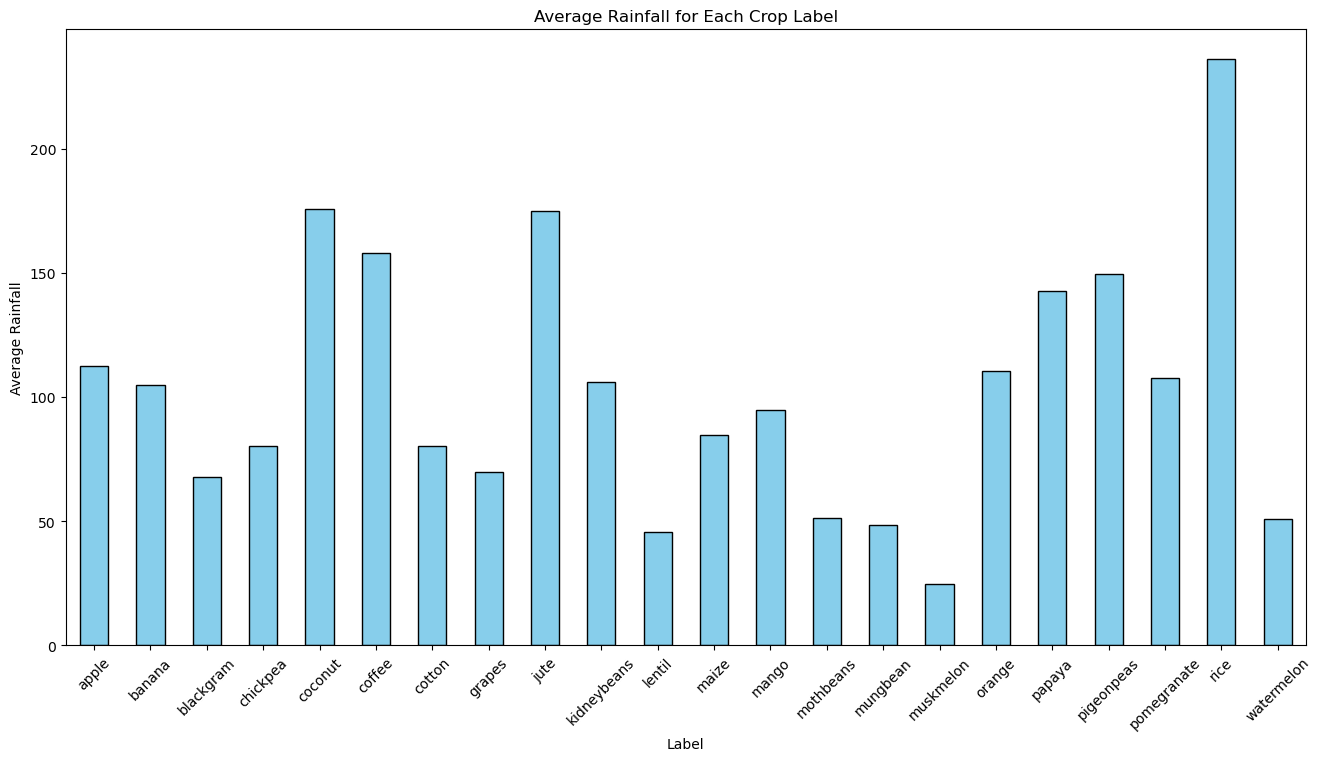

In [45]:
# Calculate average rainfall for each label
average_rainfall = df.groupby("label")["rainfall"].mean()

# Create a larger bar chart
plt.figure(figsize=(16, 8)) 
average_rainfall.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Label")
plt.ylabel("Average Rainfall")
plt.title("Average Rainfall for Each Crop Label")
plt.xticks(rotation=45)
plt.show()


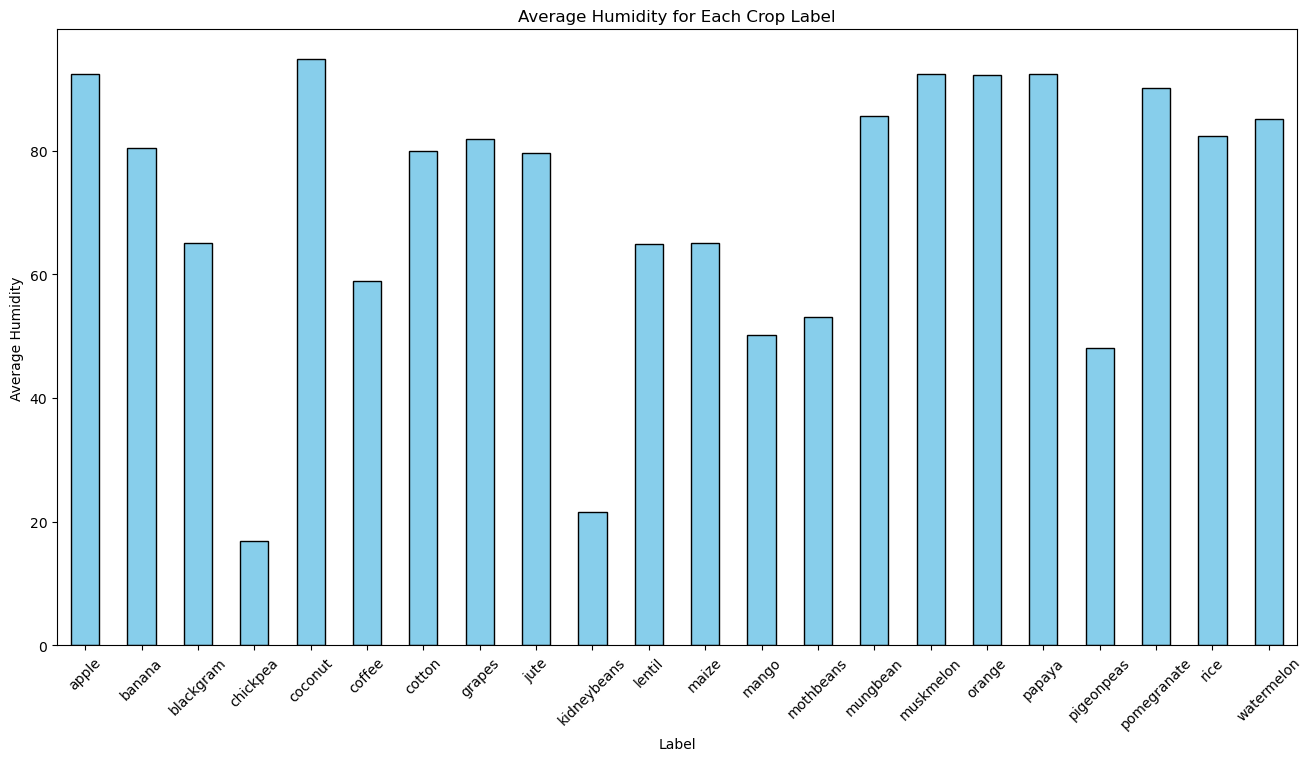

In [44]:
# Calculate average humidity for each label
average_humidity = df.groupby("label")["humidity"].mean()

# Create a larger bar chart
plt.figure(figsize=(16, 8)) 
average_humidity.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Label")
plt.ylabel("Average Humidity")
plt.title("Average Humidity for Each Crop Label")
plt.xticks(rotation=45)
plt.show()


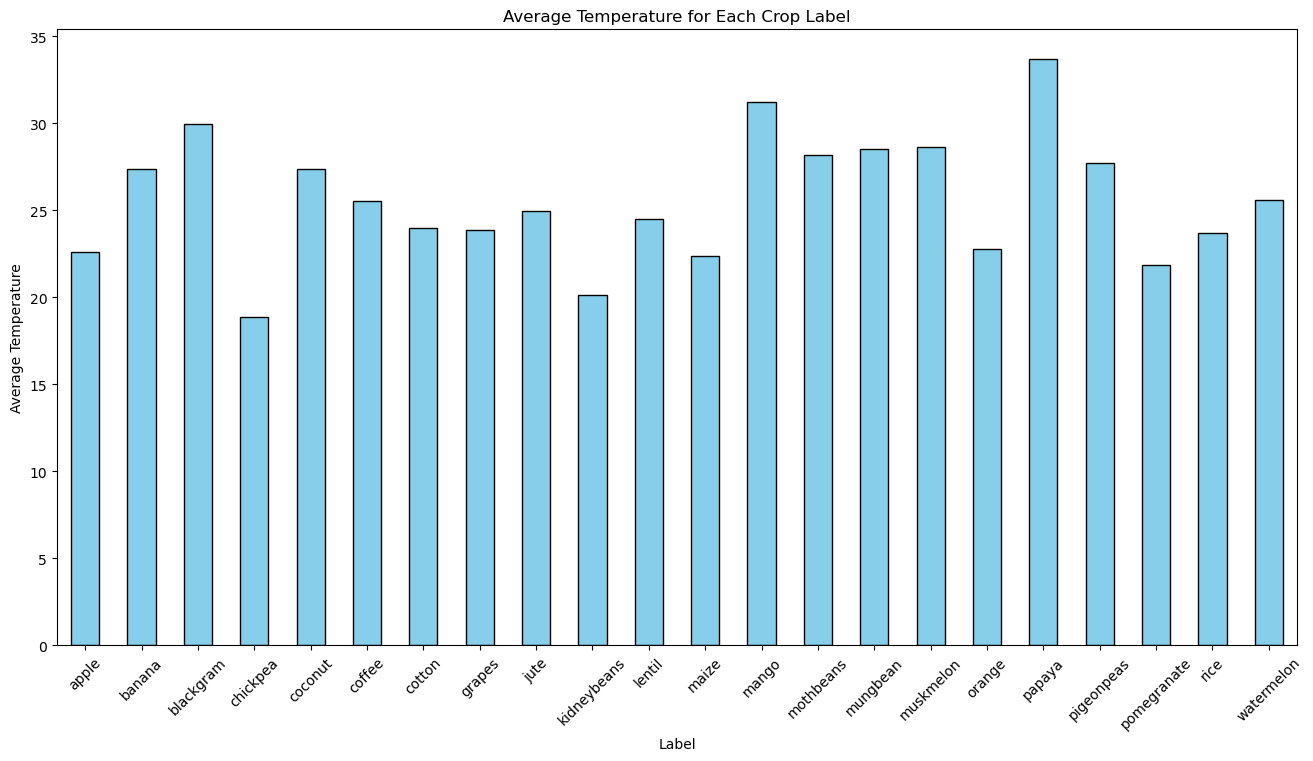

In [47]:
# Calculate average temperature for each label
average_temperature = df.groupby("label")["temperature"].mean()

# Create a larger bar chart
plt.figure(figsize=(16, 8)) 
average_temperature.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Label")
plt.ylabel("Average Temperature")
plt.title("Average Temperature for Each Crop Label")
plt.xticks(rotation=45)
plt.show()


In [48]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [50]:
# These columns contain strings
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

label


In [51]:
# This will turn all of the string values into category values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [52]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [54]:
df_tmp.label.cat.categories

Index(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango',
       'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas',
       'pomegranate', 'rice', 'watermelon'],
      dtype='object')

In [56]:
df_tmp.label.cat.codes

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Length: 2200, dtype: int8

In [57]:
# Save preprocessed data
df_tmp.to_csv("./data/crop_recomendation_preprocessed",
              index=False)

In [58]:
# Import preprocessed data
df_tmp = pd.read_csv("./data/crop_recomendation_preprocessed",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
N,90,85,60,74,78
P,42,58,55,35,42
K,43,41,44,40,42
temperature,20.879744,21.770462,23.004459,26.491096,20.130175
humidity,82.002744,80.319644,82.320763,80.158363,81.604873
ph,6.502985,7.038096,7.840207,6.980401,7.628473
rainfall,202.935536,226.655537,263.964248,242.864034,262.71734
label,rice,rice,rice,rice,rice


In [60]:
# Turn categorical variables into numbers and fill missing
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label]=pd.Categorical(content).codes+1

In [61]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N                 2200 non-null   int64  
 1   P                 2200 non-null   int64  
 2   K                 2200 non-null   int64  
 3   temperature       2200 non-null   float64
 4   humidity          2200 non-null   float64
 5   ph                2200 non-null   float64
 6   rainfall          2200 non-null   float64
 7   label             2200 non-null   int8   
 8   label_is_missing  2200 non-null   bool   
dtypes: bool(1), float64(4), int64(3), int8(1)
memory usage: 124.7 KB


In [63]:
# Make a correlation matrix
df_tmp.corr()

,N,P,K,temperature,humidity,ph,rainfall,label,label_is_missing
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130,NaN
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006,NaN
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417,NaN
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606,NaN
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911,NaN
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253,NaN
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611,NaN
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000,NaN
label_is_missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9.5, -0.5)

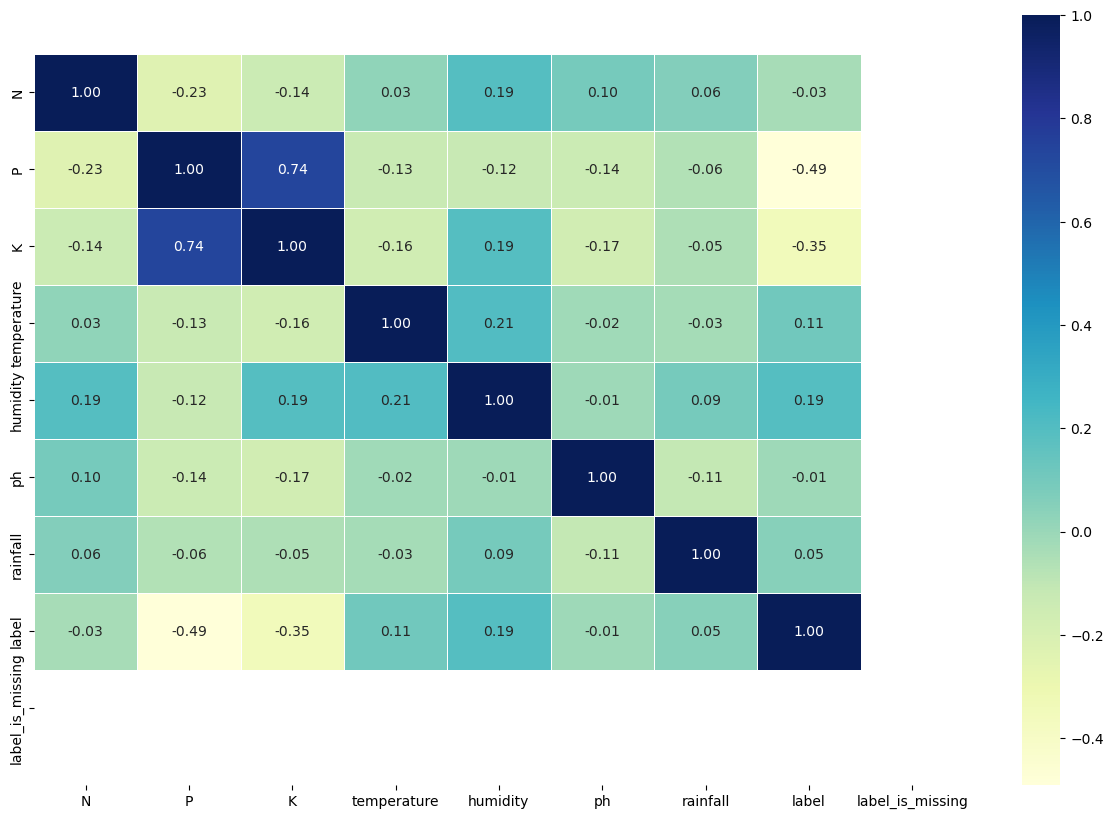

In [64]:
# Let's make our correlation matrix a little prettier
corr_matrix=df_tmp.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)

# Modelling

In [65]:
# get the image 
Image(url="./data/ml-map.png", width=900, height=300)

In [66]:
# Split data into X and y
x=df.drop("label",axis=1)
y=df["label"]

In [67]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [68]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [70]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=.2)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

Now we have got our data split into training and test sets, it's time to build a machine learning model.

we'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

we am going to try 3 different machine learning models:

1.Logistic Regression</br>
2.K-Nearest Neighbours Classifier</br>
3.Random Forest Classifier

In [74]:
#Importing the models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [75]:
model_scores=fit_and_score(models=models,
                           X_train=x_train,
                           X_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

D:\coding\Data Science\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9454545454545454,
 'KNN': 0.9704545454545455,
 'Random Forest': 0.9931818181818182}

<Axes: >

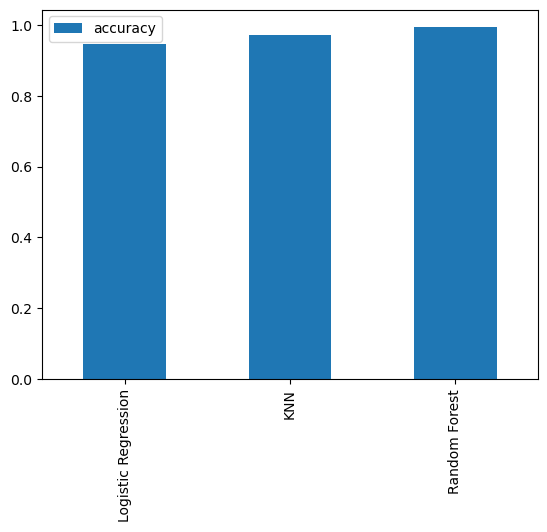

In [76]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

# Hyperparameter tuning (by hand)

In [77]:

# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)
# Setup KNN instance
knn = KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algo
    knn.fit(x_train,y_train)
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

    

Maximum KNN score on test data:97.05%


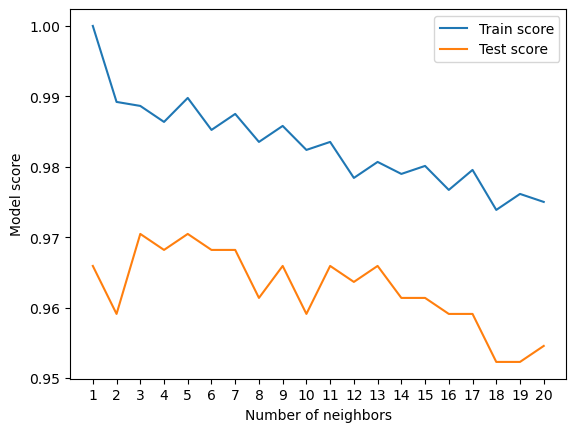

In [78]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data:{max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

we are going to tune
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [80]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2) }

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [83]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [88]:
# Most ideal
ideal_model = LogisticRegression(
    solver="liblinear", 
    C=29.763514416313132
)


In [89]:
ideal_model.fit(x_train,y_train)
ideal_model.score(x_test,y_test)

0.9477272727272728

In [90]:
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [91]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [92]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.9931818181818182

# Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [95]:
# Different hyperparameters for our LogisticRegression model
from sklearn.model_selection import GridSearchCV
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [96]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.9477272727272728

# Evaluting our machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [97]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

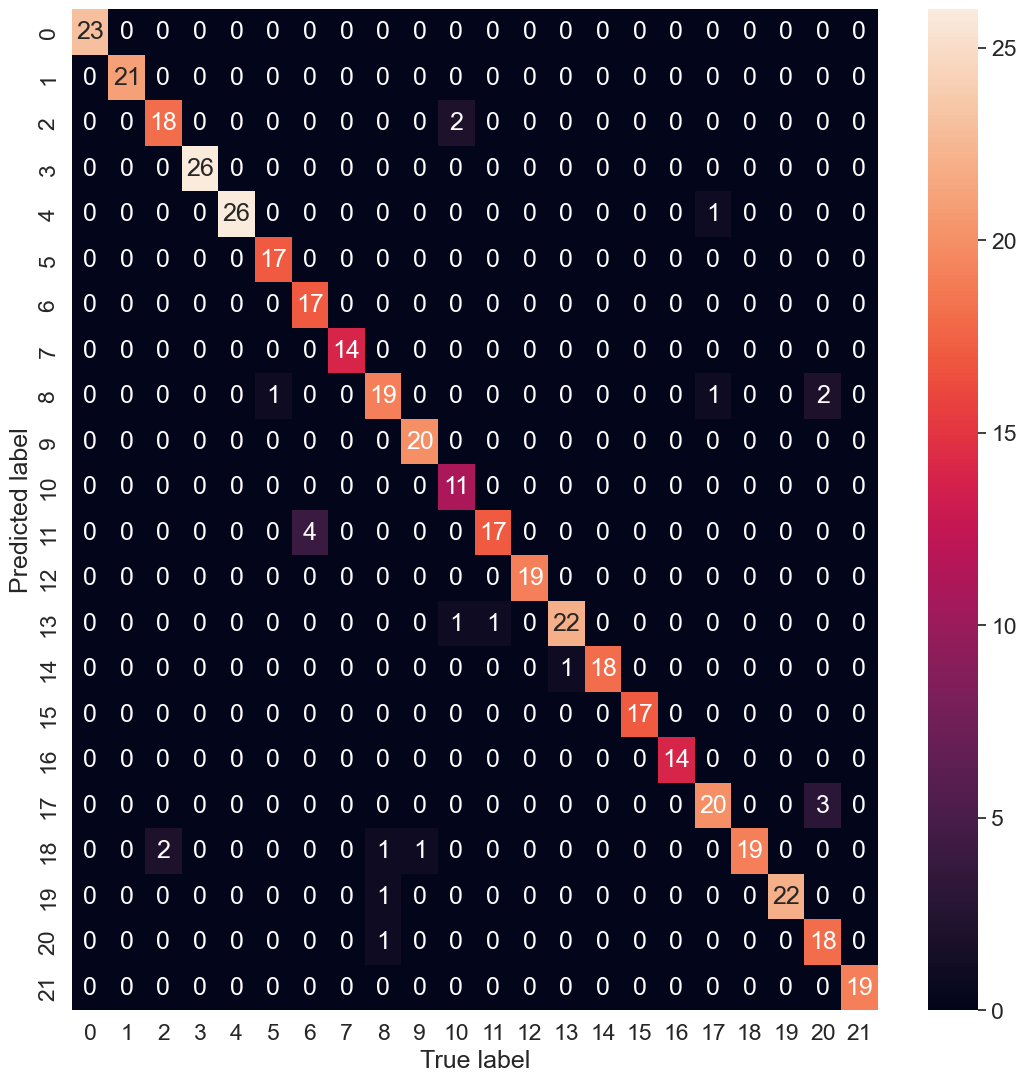

In [108]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(13,13))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom,top=ax.get_ylim()
    # ax.set_ylim(bottom+.5,top-.5)

plot_conf_mat(y_test,y_preds)
    

# Calculate evaluation metrics using cross-validation

I am going to calculate accuracy, precision, recall and f1-score of my model using cross-validation and to do so I'll be using cross_val_score().

In [109]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 32.90344562312671, 'solver': 'liblinear'}

In [110]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=32.90344562312671,
                       solver="liblinear")

In [115]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.9613636363636365

# Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [119]:
# Fit an instance of LogisticRegression
clf=LogisticRegression(C=32.90344562312671,
                       solver="liblinear")
clf.fit(x_train,y_train);

In [120]:
# Check coef_
clf.coef_

array([[-7.67647951e-02,  3.52857119e-02,  1.16923369e-01,
        -7.96316219e-02,  2.99425347e-01, -6.91490779e+00,
         1.11511608e-01],
       [ 1.49965356e-01,  4.16381572e-01, -1.65763373e-01,
         1.16781502e-01,  1.34104093e-01, -6.16213329e+00,
        -9.16115166e-03],
       [ 2.89236246e-02,  1.26920025e-01, -1.90516233e-01,
         3.97024213e-01, -5.72362650e-03,  4.99280718e-01,
        -2.96731981e-02],
       [ 1.67452493e-01, -6.39032999e-02,  2.93030001e-01,
         3.72534991e-02, -8.29361050e-01,  1.01054873e-01,
        -1.55644192e-02],
       [-1.08952822e-01, -2.75648951e-01, -2.65790402e-02,
         2.90331760e-01,  5.02694019e-01, -7.92658532e+00,
         9.37341645e-02],
       [ 2.97202587e-01, -4.80392242e-01, -1.94295218e-01,
         1.77171052e-01, -6.40294609e-01,  2.49863604e+00,
         1.04944419e-01],
       [ 2.39397097e-01, -3.51971799e-02, -5.33741265e-01,
        -1.95386914e-01,  1.92057135e-01, -4.96137762e-01,
        -6.4059858

In [121]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'N': -0.07676479506792859,
 'P': 0.03528571185875564,
 'K': 0.11692336886198083,
 'temperature': -0.07963162189619462,
 'humidity': 0.29942534658544506,
 'ph': -6.914907789812605,
 'rainfall': 0.1115116082239742}

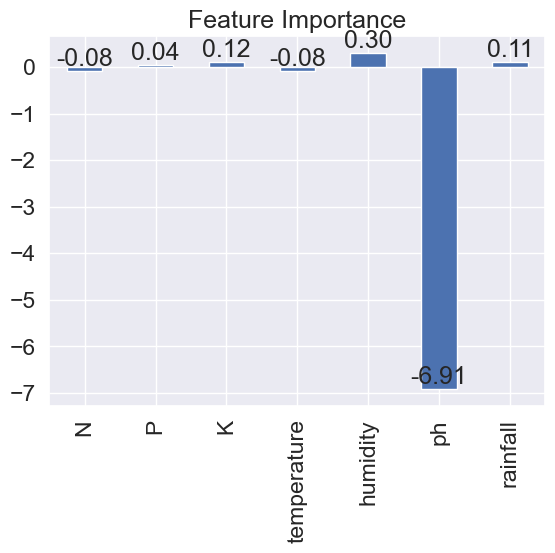

In [125]:

# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
ax=feature_df.T.plot.bar(title="Feature Importance", legend=False);
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.2f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom')

# 6. Experimentation

We can collect more data to improve our model and do more adjustment

**************************************************************************************************************

In [128]:
# Save the model to a pickle file
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf, file)